# Indexing, Selecting & Assigning

In [1]:
import pandas as pd
import numpy as np


In [76]:
wine_data = 'https://raw.githubusercontent.com/lju-lazarevic/wine/refs/heads/master/data/winemag-data-130k-v2.csv'
reviews = pd.read_csv(wine_data) #index_col=0

In [77]:
reviews.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
0,94355,Austria,"""Chremisa,"" the ancient name of Krems, is comm...",Edition Chremisa Sandgrube 13,85,24.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Winzer Krems 2011 Edition Chremisa Sandgrube 1...,Grüner Veltliner,Winzer Krems,NaN
1,126883,US,$10 for this very drinkable Cab? That's crazy....,NaN,87,10.0,California,North Coast,North Coast,Virginie Boone,@vboone,Line 39 2009 Cabernet Sauvignon (North Coast),Cabernet Sauvignon,Line 39,NaN
2,119493,US,$14 is a pretty good price for a Chardonnay th...,Whiplash,86,14.0,California,California,California Other,NaN,NaN,Jamieson Ranch 2011 Whiplash Chardonnay (Calif...,Chardonnay,Jamieson Ranch,NaN
3,126909,Spain,"). Earth, cola and leather aromas are good, ho...",Finca Resalso,86,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2009 Finca Resalso (Ribera del Du...,Tinto Fino,Emilio Moro,NaN
4,119752,Spain,). Light and lemony on the nose. The palate ha...,NaN,87,17.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,La Caña 2010 Albariño (Rías Baixas),Albariño,La Caña,NaN


### Introduction
Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.

### Native accessors
Native Python objects provide good ways of indexing data. Pandas carries all of these over, which helps make it easy to start with.

Consider this DataFrame:

In [7]:
reviews.sample(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
31542,Chile,"Lactic and creamy smelling, with a muddled, gr...",Reserva,84,12.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Chilensis 2008 Reserva Carmenère (Maule Valley),Carmenère,Chilensis,NaN
27062,France,This vineyard is at the southern end of Meursa...,Meursault Charmes Premier Cru,94,103.0,Burgundy,Meursault,NaN,Roger Voss,@vossroger,Louis Jadot 2014 Meursault Charmes Premier Cru...,Chardonnay,Louis Jadot,NaN
53457,Austria,Typical pepper and spice flavors mark this win...,NaN,88,13.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Graf Hardegg 2009 Grüner Veltliner (Niederöste...,Grüner Veltliner,Graf Hardegg,NaN


In Python, we can access the property of an object by accessing it as an attribute. A book object, for example, might have a title property, which we can access by calling `book.title`. Columns in a pandas `DataFrame` work in much the same way.

Hence to access the country property of `reviews` we can use:

In [8]:
reviews.country

id
94355     Austria
126883         US
119493         US
126909      Spain
119752      Spain
           ...   
80210       Italy
76487       Italy
86953       Italy
18824          US
88999     Austria
Name: country, Length: 119988, dtype: object

If we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [9]:
reviews['country']

id
94355     Austria
126883         US
119493         US
126909      Spain
119752      Spain
           ...   
80210       Italy
76487       Italy
86953       Italy
18824          US
88999     Austria
Name: country, Length: 119988, dtype: object

These are the two ways of selecting a specific Series out of a DataFrame. Neither of them is more or less syntactically valid than the other, but the indexing operator `[]` does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a `country providence column`, reviews.country providence` wouldn't work).

Doesn't a pandas Series look kind of like a fancy dictionary? It pretty much is, so it's no surprise that, to drill down to a single specific value, we need only use the indexing operator `[]` once more:

In [10]:
reviews['country'][0]

'Italy'

### Indexing in pandas

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, `loc` and `iloc`. For more advanced operations, these are the ones you're supposed to be using.

#### Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. `iloc` follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [ ]:
reviews.iloc[0] # Return a Pandas' Series with the first row

country                                                            Austria
description              "Chremisa," the ancient name of Krems, is comm...
designation                                  Edition Chremisa Sandgrube 13
points                                                                  85
price                                                                 24.0
province                                                  Niederösterreich
region_1                                                               NaN
region_2                                                               NaN
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                    Winzer Krems 2011 Edition Chremisa Sandgrube 1...
variety                                                   Grüner Veltliner
winery                                                        Winzer Krems
dupe?                    

Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with `iloc`, we can do the following:

In [13]:
reviews.iloc[:, 0]

id
94355     Austria
126883         US
119493         US
126909      Spain
119752      Spain
           ...   
80210       Italy
76487       Italy
86953       Italy
18824          US
88999     Austria
Name: country, Length: 119988, dtype: object

On its own, the `:` operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the `country` column from just the first, second, and third row, we would do:

In [15]:
reviews.iloc[:3, 0]

id
94355     Austria
126883         US
119493         US
Name: country, dtype: object

Or, to select just the second and third entries, we would do:

In [16]:
reviews.iloc[1:3, 0]

id
126883    US
119493    US
Name: country, dtype: object

It's also possible to pass a list:

In [17]:
reviews.iloc[[1, 2, 3], 0]

id
126883       US
119493       US
126909    Spain
Name: country, dtype: object

Finally, it's worth knowing that negative numbers can be used in selection. This will start counting forwards from the end of the values. So for example here are the last five elements of the dataset.

In [19]:
reviews.iloc[-5:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN
76487,Italy,Zonin's 2006 Amarone opens with very ripe arom...,NaN,88,70.0,Veneto,Amarone della Valpolicella,NaN,NaN,NaN,Zonin 2006 Amarone della Valpolicella,"Corvina, Rondinella, Molinara",Zonin,NaN
86953,Italy,Zorzettig's precious Picolit dessert wine deli...,NaN,90,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,NaN,NaN,Zorzettig 2006 Picolit (Colli Orientali del Fr...,Picolit,Zorzettig,NaN
18824,US,Zucca has made a fragrant and floral Sangioves...,Sangiovese Rosato,87,18.0,California,Amador County,Sierra Foothills,Virginie Boone,@vboone,Zucca 2010 Sangiovese Rosato Rosé (Amador County),Rosé,Zucca,NaN
88999,Austria,Zweigelt can do easy-drinking styles but in th...,Heideboden,90,26.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Nittnaus Hans und Christine 2013 Heideboden Zw...,Zweigelt,Nittnaus Hans und Christine,NaN


### Label-based selection

The second paradigm for attribute selection is the one followed by the `loc` operator: `label-based` selection. In this paradigm, it's the data index value, not its position, which matters.

For example, to get the first entry in `reviews`, we would now do the following:

In [20]:
reviews.loc[0, 'country']

'Italy'

`iloc` is conceptually simpler than `loc` because it ignores the dataset's indices. When we use `iloc` we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. loc, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead. For example, here's one operation that's much easier using `loc`:

In [24]:
reviews.loc[:,['taster_name', 'taster_twitter_handle', 'points']]

,taster_name,taster_twitter_handle,points
id,,,
94355,Roger Voss,@vossroger,85
126883,Virginie Boone,@vboone,87
119493,NaN,NaN,86
126909,Michael Schachner,@wineschach,86
119752,Michael Schachner,@wineschach,87
...,...,...,...
80210,NaN,NaN,90
76487,NaN,NaN,88
86953,NaN,NaN,90


### Choosing between loc and iloc

When choosing or transitioning between `loc` and `iloc`, there is one `"gotcha"`worth keeping in mind, which is that the two methods use slightly different indexing schemes.

`iloc` uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. `loc`, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that loc can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index `df.loc['Apples':'Potatoes']` than it is to index something like `df.loc['Apples', 'Potatoet']` (t coming after s in the alphabet).

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case `df.iloc[0:1000]` will return 1000 entries, while `df.loc[0:1000]` return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for `df.loc[0:999]`.

Otherwise, the semantics of using loc are the same as those for iloc.

### Manipulating the index

`Label-based` selection derives its power from the labels in the `index`. Critically, the index we use is not immutable. We can manipulate the index in any way we see fit.

The `set_index()` method can be used to do the job. Here is what happens when we set_index to the title field:

In [25]:
reviews.set_index('title')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery,dupe?
title,,,,,,,,,,,,,
Winzer Krems 2011 Edition Chremisa Sandgrube 13 Grüner Veltliner (Niederösterreich),Austria,"""Chremisa,"" the ancient name of Krems, is comm...",Edition Chremisa Sandgrube 13,85,24.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Grüner Veltliner,Winzer Krems,NaN
Line 39 2009 Cabernet Sauvignon (North Coast),US,$10 for this very drinkable Cab? That's crazy....,NaN,87,10.0,California,North Coast,North Coast,Virginie Boone,@vboone,Cabernet Sauvignon,Line 39,NaN
Jamieson Ranch 2011 Whiplash Chardonnay (California),US,$14 is a pretty good price for a Chardonnay th...,Whiplash,86,14.0,California,California,California Other,NaN,NaN,Chardonnay,Jamieson Ranch,NaN
Emilio Moro 2009 Finca Resalso (Ribera del Duero),Spain,"). Earth, cola and leather aromas are good, ho...",Finca Resalso,86,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Tinto Fino,Emilio Moro,NaN
La Caña 2010 Albariño (Rías Baixas),Spain,). Light and lemony on the nose. The palate ha...,NaN,87,17.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Albariño,La Caña,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ceretto 2004 Zonchera (Barolo),Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Nebbiolo,Ceretto,NaN
Zonin 2006 Amarone della Valpolicella,Italy,Zonin's 2006 Amarone opens with very ripe arom...,NaN,88,70.0,Veneto,Amarone della Valpolicella,NaN,NaN,NaN,"Corvina, Rondinella, Molinara",Zonin,NaN
Zorzettig 2006 Picolit (Colli Orientali del Friuli),Italy,Zorzettig's precious Picolit dessert wine deli...,NaN,90,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,NaN,NaN,Picolit,Zorzettig,NaN


This is useful if you can come up with an index for the dataset which is better than the current one.

### Conditional selection

So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.

For example, suppose that we're interested specifically in better-than-average wines produced in Italy.

We can start by checking if each wine is Italian or not:

In [26]:
reviews.country == 'Italy'

id
94355     False
126883    False
119493    False
126909    False
119752    False
          ...  
80210      True
76487      True
86953      True
18824     False
88999     False
Name: country, Length: 119988, dtype: bool

This operation produced a **Series** of `True/False` booleans based on the country of each record. This result can then be used inside of loc to select the relevant data:

In [ ]:
reviews.loc[reviews.country == 'Italy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
115413,Italy,). Rubiolo is a soft and lush Chianti Classico...,Rubiolo,88,23.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Gagliole 2009 Rubiolo (Chianti Classico),Sangiovese,Gagliole,NaN
23362,Italy,". There's a compact, traditional characteristi...",Vigneto Bellavista,90,169.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Castello di Ama 2006 Vigneto Bellavista (Chia...,Sangiovese,Castello di Ama,NaN
76094,Italy,. This rich and opulent blend of Cabernet Sauv...,Volpolo,92,50.0,Tuscany,Bolgheri,NaN,NaN,NaN,Podere Sapaio 2008 Volpolo (Bolgheri),Red Blend,Podere Sapaio,NaN
83416,Italy,"100% Cabernet Sauvignon, this opens with aroma...",Basilica del Cortaccio,91,40.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Cafaggio 2010 Basilica del Cortaccio Cabernet ...,Cabernet Sauvignon,Cafaggio,NaN
4515,Italy,95 Massolino 2012 Parafada (Barolo). A textb...,Parafada,95,96.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Massolino 2012 Parafada (Barolo),Nebbiolo,Massolino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,Italy,Zibibbo is usually presented as a passito dess...,NaN,86,35.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Barraco 2010 Zibibbo (Sicilia),Zibibbo,Barraco,NaN
70889,Italy,Zisola is a Nero d'Avola that is aged 10 month...,NaN,90,23.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Zisola 2006 Nero d'Avola (Sicilia),Nero d'Avola,Zisola,NaN
80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN


We also can use .query

In [28]:
reviews.query('country == "Italy"')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
115413,Italy,). Rubiolo is a soft and lush Chianti Classico...,Rubiolo,88,23.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Gagliole 2009 Rubiolo (Chianti Classico),Sangiovese,Gagliole,NaN
23362,Italy,". There's a compact, traditional characteristi...",Vigneto Bellavista,90,169.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Castello di Ama 2006 Vigneto Bellavista (Chia...,Sangiovese,Castello di Ama,NaN
76094,Italy,. This rich and opulent blend of Cabernet Sauv...,Volpolo,92,50.0,Tuscany,Bolgheri,NaN,NaN,NaN,Podere Sapaio 2008 Volpolo (Bolgheri),Red Blend,Podere Sapaio,NaN
83416,Italy,"100% Cabernet Sauvignon, this opens with aroma...",Basilica del Cortaccio,91,40.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Cafaggio 2010 Basilica del Cortaccio Cabernet ...,Cabernet Sauvignon,Cafaggio,NaN
4515,Italy,95 Massolino 2012 Parafada (Barolo). A textb...,Parafada,95,96.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Massolino 2012 Parafada (Barolo),Nebbiolo,Massolino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,Italy,Zibibbo is usually presented as a passito dess...,NaN,86,35.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Barraco 2010 Zibibbo (Sicilia),Zibibbo,Barraco,NaN
70889,Italy,Zisola is a Nero d'Avola that is aged 10 month...,NaN,90,23.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Zisola 2006 Nero d'Avola (Sicilia),Nero d'Avola,Zisola,NaN
80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN


This DataFrame has ***~20,000 rows***. The original had ***~130,000***. That means that around `15%` of wines originate from `Italy`.

We also wanted to know which ones are better than average. Wines are reviewed on a 80-to-100 point scale, so this could mean wines that accrued at least 90 points.

We can use the ampersand (&) to bring the two questions together:

In [33]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
23362,Italy,". There's a compact, traditional characteristi...",Vigneto Bellavista,90,169.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Castello di Ama 2006 Vigneto Bellavista (Chia...,Sangiovese,Castello di Ama,NaN
76094,Italy,. This rich and opulent blend of Cabernet Sauv...,Volpolo,92,50.0,Tuscany,Bolgheri,NaN,NaN,NaN,Podere Sapaio 2008 Volpolo (Bolgheri),Red Blend,Podere Sapaio,NaN
83416,Italy,"100% Cabernet Sauvignon, this opens with aroma...",Basilica del Cortaccio,91,40.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Cafaggio 2010 Basilica del Cortaccio Cabernet ...,Cabernet Sauvignon,Cafaggio,NaN
4515,Italy,95 Massolino 2012 Parafada (Barolo). A textb...,Parafada,95,96.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Massolino 2012 Parafada (Barolo),Nebbiolo,Massolino,NaN
81278,Italy,"A 25th anniversary special selection, this bea...",Selezione XXV Anno,93,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Castello Romitorio 2006 Selezione XXV Anno (B...,Sangiovese Grosso,Castello Romitorio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54397,Italy,Zenato is a reliable producer of quality Amaro...,NaN,92,30.0,Veneto,Amarone della Valpolicella Classico,NaN,NaN,NaN,Zenato 2008 Amarone della Valpolicella Classico,"Corvina, Rondinella, Molinara",Zenato,NaN
59349,Italy,Zenato's rich and powerful Recioto opens with ...,500 ml,90,NaN,Veneto,Recioto della Valpolicella Classico,NaN,NaN,NaN,Zenato 2006 500 ml (Recioto della Valpolicell...,"Corvina, Rondinella, Molinara",Zenato,NaN
70889,Italy,Zisola is a Nero d'Avola that is aged 10 month...,NaN,90,23.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Zisola 2006 Nero d'Avola (Sicilia),Nero d'Avola,Zisola,NaN


Suppose we'll buy any wine that's made in Italy or which is rated above average. For this we use a pipe `(|)`:

In [34]:
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
115413,Italy,). Rubiolo is a soft and lush Chianti Classico...,Rubiolo,88,23.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Gagliole 2009 Rubiolo (Chianti Classico),Sangiovese,Gagliole,NaN
29339,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,NaN,NaN,Mauritson 2009 Rockpile Ridge Vineyard Caberne...,Cabernet Sauvignon,Mauritson,NaN
98444,US,). Vineyard 7&8's Spring Mountain Estate Caber...,Estate,94,125.0,California,Spring Mountain District,Napa,NaN,NaN,Vineyard 7&8 2009 Estate Cabernet Sauvignon (S...,Cabernet Sauvignon,Vineyard 7&8,NaN
60042,US,). You'll want to cellar this young 100% Cab b...,Family Reserve,93,145.0,California,Napa Valley,Napa,NaN,NaN,Venge 2010 Family Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,Venge,NaN
62258,US,. A delightfully intriguing “White Burgundy” b...,White Burgundy,90,29.0,California,North Coast,North Coast,Virginie Boone,@vboone,Imagery 2009 White Burgundy White (North Coast),White Blend,Imagery,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,US,Zocker flies under the radar with this Austria...,Paragon Vineyard,90,20.0,California,Edna Valley,Central Coast,NaN,NaN,Zocker 2012 Paragon Vineyard Grüner Veltliner ...,Grüner Veltliner,Zocker,NaN
80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN
76487,Italy,Zonin's 2006 Amarone opens with very ripe arom...,NaN,88,70.0,Veneto,Amarone della Valpolicella,NaN,NaN,NaN,Zonin 2006 Amarone della Valpolicella,"Corvina, Rondinella, Molinara",Zonin,NaN


Pandas comes with a few `built-in` conditional selectors, two of which we will highlight here.

The first is `isin`. `isin` is lets you select data whose value ***"is in"*** a list of values. For example, here's how we can use it to select wines only from Italy or France:

In [35]:
reviews.loc[reviews.country.isin(['Italy', 'France'])]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
115413,Italy,). Rubiolo is a soft and lush Chianti Classico...,Rubiolo,88,23.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Gagliole 2009 Rubiolo (Chianti Classico),Sangiovese,Gagliole,NaN
101344,France,. Recent vintages have left Bordeaux with an a...,NaN,87,17.0,Bordeaux,Bordeaux Supérieur,NaN,Roger Voss,@vossroger,Château Sainte-Barbe 2010 Bordeaux Supérieur,Bordeaux-style Red Blend,Château Sainte-Barbe,NaN
23362,Italy,". There's a compact, traditional characteristi...",Vigneto Bellavista,90,169.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Castello di Ama 2006 Vigneto Bellavista (Chia...,Sangiovese,Castello di Ama,NaN
76094,Italy,. This rich and opulent blend of Cabernet Sauv...,Volpolo,92,50.0,Tuscany,Bolgheri,NaN,NaN,NaN,Podere Sapaio 2008 Volpolo (Bolgheri),Red Blend,Podere Sapaio,NaN
83416,Italy,"100% Cabernet Sauvignon, this opens with aroma...",Basilica del Cortaccio,91,40.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Cafaggio 2010 Basilica del Cortaccio Cabernet ...,Cabernet Sauvignon,Cafaggio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98934,France,Zind-Humbrecht owns some great Grand Cru viney...,Clos Saint Urbain Rangen de Thann Grand Cru,94,105.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Zind-Humbrecht 2012 Clos Saint Urbain ...,Pinot Gris,Domaine Zind-Humbrecht,NaN
70889,Italy,Zisola is a Nero d'Avola that is aged 10 month...,NaN,90,23.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Zisola 2006 Nero d'Avola (Sicilia),Nero d'Avola,Zisola,NaN
80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN


The second is `isnull` (and its companion **notnull**). These methods let you highlight values which are (or are not) ***empty (NaN)***. For example, to filter out wines lacking a price tag in the dataset, here's what we would do:

In [38]:
reviews.loc[reviews.price.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
94355,Austria,"""Chremisa,"" the ancient name of Krems, is comm...",Edition Chremisa Sandgrube 13,85,24.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Winzer Krems 2011 Edition Chremisa Sandgrube 1...,Grüner Veltliner,Winzer Krems,NaN
126883,US,$10 for this very drinkable Cab? That's crazy....,NaN,87,10.0,California,North Coast,North Coast,Virginie Boone,@vboone,Line 39 2009 Cabernet Sauvignon (North Coast),Cabernet Sauvignon,Line 39,NaN
119493,US,$14 is a pretty good price for a Chardonnay th...,Whiplash,86,14.0,California,California,California Other,NaN,NaN,Jamieson Ranch 2011 Whiplash Chardonnay (Calif...,Chardonnay,Jamieson Ranch,NaN
126909,Spain,"). Earth, cola and leather aromas are good, ho...",Finca Resalso,86,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2009 Finca Resalso (Ribera del Du...,Tinto Fino,Emilio Moro,NaN
119752,Spain,). Light and lemony on the nose. The palate ha...,NaN,87,17.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,La Caña 2010 Albariño (Rías Baixas),Albariño,La Caña,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,US,Zocker flies under the radar with this Austria...,Paragon Vineyard,90,20.0,California,Edna Valley,Central Coast,NaN,NaN,Zocker 2012 Paragon Vineyard Grüner Veltliner ...,Grüner Veltliner,Zocker,NaN
80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN
76487,Italy,Zonin's 2006 Amarone opens with very ripe arom...,NaN,88,70.0,Veneto,Amarone della Valpolicella,NaN,NaN,NaN,Zonin 2006 Amarone della Valpolicella,"Corvina, Rondinella, Molinara",Zonin,NaN


### Assigning data
Going the other way, assigning data to a DataFrame is easy. You can assign either a constant value:

In [39]:
reviews['critic'] = 'everyone'
reviews['critic'] 

id
94355     everyone
126883    everyone
119493    everyone
126909    everyone
119752    everyone
            ...   
80210     everyone
76487     everyone
86953     everyone
18824     everyone
88999     everyone
Name: critic, Length: 119988, dtype: object

Or with an iterable of values:

In [40]:
reviews['index_backwards'] = range(len(reviews), 0, -1)
reviews['index_backwards']

id
94355     119988
126883    119987
119493    119986
126909    119985
119752    119984
           ...  
80210          5
76487          4
86953          3
18824          2
88999          1
Name: index_backwards, Length: 119988, dtype: int64

## Exercise

### 1.Select the description column from reviews and assign the result to the variable desc.

In [42]:
desc = reviews.description
desc 

id
94355     "Chremisa," the ancient name of Krems, is comm...
126883    $10 for this very drinkable Cab? That's crazy....
119493    $14 is a pretty good price for a Chardonnay th...
126909    ). Earth, cola and leather aromas are good, ho...
119752    ). Light and lemony on the nose. The palate ha...
                                ...                        
80210     Zonchera is Ceretto's more affordable base Bar...
76487     Zonin's 2006 Amarone opens with very ripe arom...
86953     Zorzettig's precious Picolit dessert wine deli...
18824     Zucca has made a fragrant and floral Sangioves...
88999     Zweigelt can do easy-drinking styles but in th...
Name: description, Length: 119988, dtype: object

### 2.Select the first value from the description column of reviews, assigning it to variable first_description.

In [43]:
first_description = reviews.description[0]
first_description 

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

### 3. Select the first row of data (the first record) from reviews, assigning it to the variable first_row.

In [45]:
first_row = reviews.iloc[0]
first_row 

country                                                            Austria
description              "Chremisa," the ancient name of Krems, is comm...
designation                                  Edition Chremisa Sandgrube 13
points                                                                  85
price                                                                 24.0
province                                                  Niederösterreich
region_1                                                               NaN
region_2                                                               NaN
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                    Winzer Krems 2011 Edition Chremisa Sandgrube 1...
variety                                                   Grüner Veltliner
winery                                                        Winzer Krems
dupe?                    

### 4.Select the first 10 values from the description column in reviews, assigning the result to variable first_descriptions.

Hint: format your output as a pandas Series.

In [52]:
first_descriptions = reviews.description.iloc[:10]
first_descriptions

id
94355     "Chremisa," the ancient name of Krems, is comm...
126883    $10 for this very drinkable Cab? That's crazy....
119493    $14 is a pretty good price for a Chardonnay th...
126909    ). Earth, cola and leather aromas are good, ho...
119752    ). Light and lemony on the nose. The palate ha...
97540     ). Phillip Zull's offering in the light, fresh...
115413    ). Rubiolo is a soft and lush Chianti Classico...
68876     ). Savory on the nose with scents of pressed a...
29339     ). Very good wine from a winery increasingly k...
98444     ). Vineyard 7&8's Spring Mountain Estate Caber...
Name: description, dtype: object

### 5.Select the records with index labels 1, 2, 3, 5, and 8, assigning the result to the variable sample_reviews.

In other words, generate the following DataFrame:

In [54]:
sample_reviews = reviews.iloc[[1, 2, 3, 5, 8]]
sample_reviews 

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?,critic,index_backwards
id,,,,,,,,,,,,,,,,
126883,US,$10 for this very drinkable Cab? That's crazy....,NaN,87,10.0,California,North Coast,North Coast,Virginie Boone,@vboone,Line 39 2009 Cabernet Sauvignon (North Coast),Cabernet Sauvignon,Line 39,NaN,everyone,119987
119493,US,$14 is a pretty good price for a Chardonnay th...,Whiplash,86,14.0,California,California,California Other,NaN,NaN,Jamieson Ranch 2011 Whiplash Chardonnay (Calif...,Chardonnay,Jamieson Ranch,NaN,everyone,119986
126909,Spain,"). Earth, cola and leather aromas are good, ho...",Finca Resalso,86,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2009 Finca Resalso (Ribera del Du...,Tinto Fino,Emilio Moro,NaN,everyone,119985
97540,Austria,"). Phillip Zull's offering in the light, fresh...",Lust & Laune,87,12.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Zull 2010 Lust & Laune Grüner Veltliner (Niede...,Grüner Veltliner,Zull,NaN,everyone,119983
29339,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,NaN,NaN,Mauritson 2009 Rockpile Ridge Vineyard Caberne...,Cabernet Sauvignon,Mauritson,NaN,everyone,119980


### 6.Create a variable df containing the country, province, region_1, and region_2 columns of the records with the index labels 0, 1, 10, and 100. In other words, generate the following DataFrame:

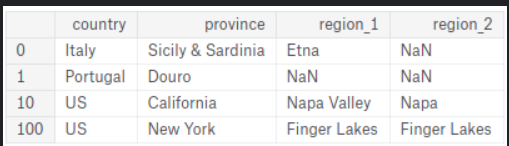

In [64]:
reviews.loc[:, ['country', 'province', 'region_1', 'region_2']].iloc[[0,1, 10, 100]]

,country,province,region_1,region_2
id,,,,
94355,Austria,Niederösterreich,NaN,NaN
126883,US,California,North Coast,North Coast
60042,US,California,Napa Valley,Napa
107889,France,Bordeaux,Pessac-Léognan,NaN


In [60]:
reviews[['country', 'province', 'region_1', 'region_2']].iloc[[0,1, 10, 100]]

,country,province,region_1,region_2
id,,,,
94355,Austria,Niederösterreich,NaN,NaN
126883,US,California,North Coast,North Coast
60042,US,California,Napa Valley,Napa
107889,France,Bordeaux,Pessac-Léognan,NaN


### 7.Create a variable df containing the country and variety columns of the first 100 records.

Hint: you may use loc or iloc. When working on the answer this question and the several of the ones that follow, keep the following "gotcha" described in the tutorial:

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. loc, meanwhile, indexes inclusively.

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case df.iloc[0:1000] will return 1000 entries, while df.loc[0:1000] return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.iloc[0:999].

In [80]:
df = reviews.loc[:100, ['country', 'variety']]
df

,country,variety
0,Austria,Grüner Veltliner
1,US,Cabernet Sauvignon
2,US,Chardonnay
3,Spain,Tinto Fino
4,Spain,Albariño
...,...,...
96,France,Bordeaux-style Red Blend
97,France,Bordeaux-style Red Blend
98,France,Bordeaux-style White Blend
99,France,Bordeaux-style Red Blend


### 8.Create a DataFrame italian_wines containing reviews of wines made in Italy. Hint: reviews.country equals what?

In [81]:
italian_wines = reviews.query('country == "Italy"')
italian_wines  

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
6,115413,Italy,). Rubiolo is a soft and lush Chianti Classico...,Rubiolo,88,23.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Gagliole 2009 Rubiolo (Chianti Classico),Sangiovese,Gagliole,NaN
18,23362,Italy,". There's a compact, traditional characteristi...",Vigneto Bellavista,90,169.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Castello di Ama 2006 Vigneto Bellavista (Chia...,Sangiovese,Castello di Ama,NaN
20,76094,Italy,. This rich and opulent blend of Cabernet Sauv...,Volpolo,92,50.0,Tuscany,Bolgheri,NaN,NaN,NaN,Podere Sapaio 2008 Volpolo (Bolgheri),Red Blend,Podere Sapaio,NaN
28,83416,Italy,"100% Cabernet Sauvignon, this opens with aroma...",Basilica del Cortaccio,91,40.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Cafaggio 2010 Basilica del Cortaccio Cabernet ...,Cabernet Sauvignon,Cafaggio,NaN
705,4515,Italy,95 Massolino 2012 Parafada (Barolo). A textb...,Parafada,95,96.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Massolino 2012 Parafada (Barolo),Nebbiolo,Massolino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119941,1349,Italy,Zibibbo is usually presented as a passito dess...,NaN,86,35.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Barraco 2010 Zibibbo (Sicilia),Zibibbo,Barraco,NaN
119981,70889,Italy,Zisola is a Nero d'Avola that is aged 10 month...,NaN,90,23.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Zisola 2006 Nero d'Avola (Sicilia),Nero d'Avola,Zisola,NaN
119983,80210,Italy,Zonchera is Ceretto's more affordable base Bar...,Zonchera,90,48.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2004 Zonchera (Barolo),Nebbiolo,Ceretto,NaN
119984,76487,Italy,Zonin's 2006 Amarone opens with very ripe arom...,NaN,88,70.0,Veneto,Amarone della Valpolicella,NaN,NaN,NaN,Zonin 2006 Amarone della Valpolicella,"Corvina, Rondinella, Molinara",Zonin,NaN


### 9.Create a DataFrame top_oceania_wines containing all reviews with at least 95 points (out of 100) for wines from Australia or New Zealand.

In [ ]:
top_oceania_wines = reviews.loc[reviews.country.isin(['Australia','New Zealand']) & (reviews.points>=95)]

top_oceania_wines.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
11123,83357,Australia,A throwback to the monster Shiraz style of old...,Grange,96,500.0,South Australia,South Australia,NaN,Joe Czerwinski,@JoeCz,Penfolds 2004 Grange Shiraz (South Australia),Shiraz,Penfolds,NaN
19655,39961,Australia,"As unevolved as they are, the dense and multil...",Grange,96,185.0,South Australia,South Australia,NaN,NaN,NaN,Penfolds 1996 Grange Shiraz (South Australia),Shiraz,Penfolds,NaN
19740,28573,Australia,Astralis has become one of Australia's top col...,Astralis,95,350.0,South Australia,Clarendon,NaN,Joe Czerwinski,@JoeCz,Clarendon Hills 2005 Astralis Syrah (Clarendon),Syrah,Clarendon Hills,NaN
20265,360,Australia,Bacon and tapenade elements merge easily on th...,Descendant,95,125.0,South Australia,Barossa Valley,NaN,Joe Czerwinski,@JoeCz,Torbreck 2012 Descendant Shiraz-Viognier (Baro...,Shiraz-Viognier,Torbreck,NaN
28432,109434,Australia,D'Arenberg's lineup of single-vineyard Shiraze...,The Swinging Malaysian Single Vineyard,96,85.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,D'Arenberg 2010 The Swinging Malaysian Single ...,Shiraz,D'Arenberg,NaN


In [82]:
reviews.country.value_counts()

country
US                        50457
France                    20353
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
